In [29]:
%matplotlib inline
import sys
import os
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
matplotlib.rcParams['pdf.fonttype'] = 42 # allow for editable text in Illustrator
matplotlib.rcParams['ps.fonttype'] = 42  # allow for editable text in Illustrator
from matplotlib.pylab import cm 
import gromics.viz.axes as axs
import seaborn as sns

In [30]:
basedir = '/cluster/work/grlab/projects/metagenome/data/metasub/queries'
plotdir = os.path.join(basedir, 'plots')
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
K = 19

fname = os.path.join(basedir, 'amr_CARD_nucleotide_fasta_protein_homolog_model_k%i.align_step2.tsv' % K)
fname_sample_meta = '../complete_metadata_extended.clean.v2.csv'
fname_amr_meta = '/cluster/work/grlab/projects/metagenome/raw_data/AMR/CARD_2.0.2/aro_metadata.tsv'
fname_amr_lens = '/cluster/work/grlab/projects/metagenome/raw_data/AMR/CARD_2.0.2/nucleotide_fasta_protein_homolog_model.fasta.lens'

In [31]:
### get all metadata
sample_metadata = pd.read_csv(fname_sample_meta, index_col=0)
sample_metadata.index = sample_metadata['uuid']
sample_metadata['latitude_rounded'] = (sample_metadata.latitude / 5).round(decimals=0) * 5
sample_metadata['longitude_rounded'] = (sample_metadata.longitude / 5).round(decimals=0) * 5
amr_metadata = pd.read_csv(fname_amr_meta, sep='\t', index_col=0)
amr_lens = dict()
for line in open(fname_amr_lens, 'r'):
    sl = line.strip().split('\t')
    amr_lens[sl[0]] = int(sl[1])

In [32]:
### generate selection function we can use for a custom groupby
def myGroup(mdf, ind, col):
    return mdf.loc[ind, col]

def groupByRow(df, tag, func):
    return df.groupby(lambda x: myGroup(amr_metadata, x, tag)).apply(func)

def groupByCol(df, tag, func):
    dft = df.transpose()
    dft = dft.groupby(lambda x: myGroup(sample_metadata, x, tag)).apply(func)
    return dft.transpose()

In [33]:
### collect the match data
count = np.zeros((3000, 10000), dtype='float')
amrs = dict()
samples = dict()
for line in open(fname, 'r'):
    sl = line.strip().split('\t')
    amrs[sl[1]] = len(amrs)
    if len(sl) < 3:
        continue
    for match in sl[2:]:
        sample, cnt = match.rsplit(':', 1)
        if not sample in samples:
            samples[sample] = len(samples)
        count[amrs[sl[1]], samples[sample]] = float(cnt) / (amr_lens[sl[1]] - K + 1)
count = count[:len(amrs), :len(samples)] 
### binarize
count = (count > 0.7).astype('int')
amrs_ = np.array([[k, v] for k,v in amrs.items()])
sidx = amrs_[:, 1].astype('int').argsort()
amrs = np.array([_.split('|')[1] + '|' + _.split('|')[4] for _ in amrs_[sidx, 0]])
del amrs_
samples_ = np.array([[k, v] for k,v in samples.items()])
sidx = samples_[:, 1].astype('int').argsort()
samples = np.array([_[1:].split(';')[0] for _ in samples_[sidx, 0]])
del samples_

In [34]:
### generate data frame
df = pd.DataFrame(count, index=amrs, columns=samples)

In [35]:
df.head()

,haib17CEM4890_H7KYMCCXY_SL273121,haib18CEM5453_HMGN5CCXY_SL344653,haib17DB4959_HMCMJCCXY_SL336168,haib17CEM4890_HKC32ALXX_SL254746,haib17CEM4890_HKC32ALXX_SL254677,haib17CEM4890_HKC32ALXX_SL254744,haib18CEM5453_HMGW3CCXY_SL342598,haib18CEM5453_HMC2KCCXY_SL336632,haib18CEM5453_HMGN5CCXY_SL344621,haib17CEM4890_HKC32ALXX_SL254687,...,haib17DB4959_HMGTJCCXY_SL342581,haib18CEM5453_HNHKFCCXY_SL345919,haib17CEM4890_H75CGCCXY_SL263706,haib18CEM5453_HNHKFCCXY_SL345904,haib18CEM5453_HNHKFCCXY_SL345921,haib17CEM5106_HCY5HCCXY_SL271180,haib18CEM5453_HNHKFCCXY_SL345968,haib17CEM5106_HCCGHCCXY_SL270554,haib17CEM5106_HCCGHCCXY_SL270525,haib17CEM5241_HMGMHCCXY_SL343491
AF028812|ARO:3002867,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EU408351|ARO:3002511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JX017365|ARO:3001989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JN967644|ARO:3002356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GQ343019|ARO:3002999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
sample_metadata[(sample_metadata.city == 'london') & (sample_metadata.core_project == 'core')].uuid

uuid
haib17CEM5106_HCCGHCCXY_SL270205    haib17CEM5106_HCCGHCCXY_SL270205
haib17CEM5106_HCCGHCCXY_SL270206    haib17CEM5106_HCCGHCCXY_SL270206
haib17CEM5106_HCCGHCCXY_SL270207    haib17CEM5106_HCCGHCCXY_SL270207
haib17CEM5106_HCCGHCCXY_SL270208    haib17CEM5106_HCCGHCCXY_SL270208
haib17CEM5106_HCCGHCCXY_SL270209    haib17CEM5106_HCCGHCCXY_SL270209
                                                  ...               
haib17CEM5106_HCY5HCCXY_SL271186    haib17CEM5106_HCY5HCCXY_SL271186
haib17CEM5106_HCY5HCCXY_SL271187    haib17CEM5106_HCY5HCCXY_SL271187
haib17CEM5106_HCY5HCCXY_SL271188    haib17CEM5106_HCY5HCCXY_SL271188
haib17CEM5106_HCY5HCCXY_SL271189    haib17CEM5106_HCY5HCCXY_SL271189
haib17CEM5106_HCY5HCCXY_SL271190    haib17CEM5106_HCY5HCCXY_SL271190
Name: uuid, Length: 576, dtype: object

In [37]:
### group by AMR drug class
df.groupby(lambda x: myGroup(amr_metadata, x, 'Drug Class')).apply(np.sum)

,haib17CEM4890_H7KYMCCXY_SL273121,haib18CEM5453_HMGN5CCXY_SL344653,haib17DB4959_HMCMJCCXY_SL336168,haib17CEM4890_HKC32ALXX_SL254746,haib17CEM4890_HKC32ALXX_SL254677,haib17CEM4890_HKC32ALXX_SL254744,haib18CEM5453_HMGW3CCXY_SL342598,haib18CEM5453_HMC2KCCXY_SL336632,haib18CEM5453_HMGN5CCXY_SL344621,haib17CEM4890_HKC32ALXX_SL254687,...,haib17DB4959_HMGTJCCXY_SL342581,haib18CEM5453_HNHKFCCXY_SL345919,haib17CEM4890_H75CGCCXY_SL263706,haib18CEM5453_HNHKFCCXY_SL345904,haib18CEM5453_HNHKFCCXY_SL345921,haib17CEM5106_HCY5HCCXY_SL271180,haib18CEM5453_HNHKFCCXY_SL345968,haib17CEM5106_HCCGHCCXY_SL270554,haib17CEM5106_HCCGHCCXY_SL270525,haib17CEM5241_HMGMHCCXY_SL343491
acridine dye,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aminocoumarin antibiotic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aminoglycoside antibiotic,2,1,0,9,4,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aminoglycoside antibiotic;cephalosporin;cephamycin;penam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aminoglycoside antibiotic;tetracycline antibiotic;phenicol antibiotic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sulfonamide antibiotic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sulfonamide antibiotic;sulfone antibiotic,0,2,0,2,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
tetracycline antibiotic,2,4,0,8,2,1,4,2,0,2,...,0,0,0,0,0,0,0,0,0,0
tetracycline antibiotic;benzalkonium chloride;rhodamine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
### group by AMR gene family
df_amr = df.groupby(lambda x: myGroup(amr_metadata, x, 'AMR Gene Family')).mean()
df_amr.head()

,haib17CEM4890_H7KYMCCXY_SL273121,haib18CEM5453_HMGN5CCXY_SL344653,haib17DB4959_HMCMJCCXY_SL336168,haib17CEM4890_HKC32ALXX_SL254746,haib17CEM4890_HKC32ALXX_SL254677,haib17CEM4890_HKC32ALXX_SL254744,haib18CEM5453_HMGW3CCXY_SL342598,haib18CEM5453_HMC2KCCXY_SL336632,haib18CEM5453_HMGN5CCXY_SL344621,haib17CEM4890_HKC32ALXX_SL254687,...,haib17DB4959_HMGTJCCXY_SL342581,haib18CEM5453_HNHKFCCXY_SL345919,haib17CEM4890_H75CGCCXY_SL263706,haib18CEM5453_HNHKFCCXY_SL345904,haib18CEM5453_HNHKFCCXY_SL345921,haib17CEM5106_HCY5HCCXY_SL271180,haib18CEM5453_HNHKFCCXY_SL345968,haib17CEM5106_HCCGHCCXY_SL270554,haib17CEM5106_HCCGHCCXY_SL270525,haib17CEM5241_HMGMHCCXY_SL343491
16S rRNA methyltransferase (A1408),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16S rRNA methyltransferase (G1405),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAC(2'),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAC(3),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAC(3);AAC(6'),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
idx = sample_metadata[(sample_metadata.city == 'london') & (sample_metadata.core_project == 'core')].uuid
idx = pd.Index(idx).intersection(df.columns)
fdf = df[idx]

In [40]:
idx = sample_metadata[(sample_metadata.city == 'london') & (sample_metadata.core_project == 'core')].uuid
idx = pd.Index(idx).intersection(df.columns)
fdf = df[idx]
lats = []
lngs = []
for i in fdf.index:
    idx = fdf.loc[i][fdf.loc[i] == 1].index
    lats.append(sample_metadata.loc[idx]['latitude'].values)
    lngs.append(sample_metadata.loc[idx]['longitude'].values)
lats = np.hstack(lats)
lngs = np.hstack(lngs)
kidx = ~np.isnan(lats) & ~np.isnan(lngs)
lats = lats[kidx]
lngs = lngs[kidx]

In [41]:
ymin,ymax = lats.min(),lats.max()
xmin,xmax = lngs.min(),lngs.max()
BBox = (xmin, xmax,  ymin, ymax)
import scipy.stats as spst
xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([lngs, lats])
kernel = spst.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

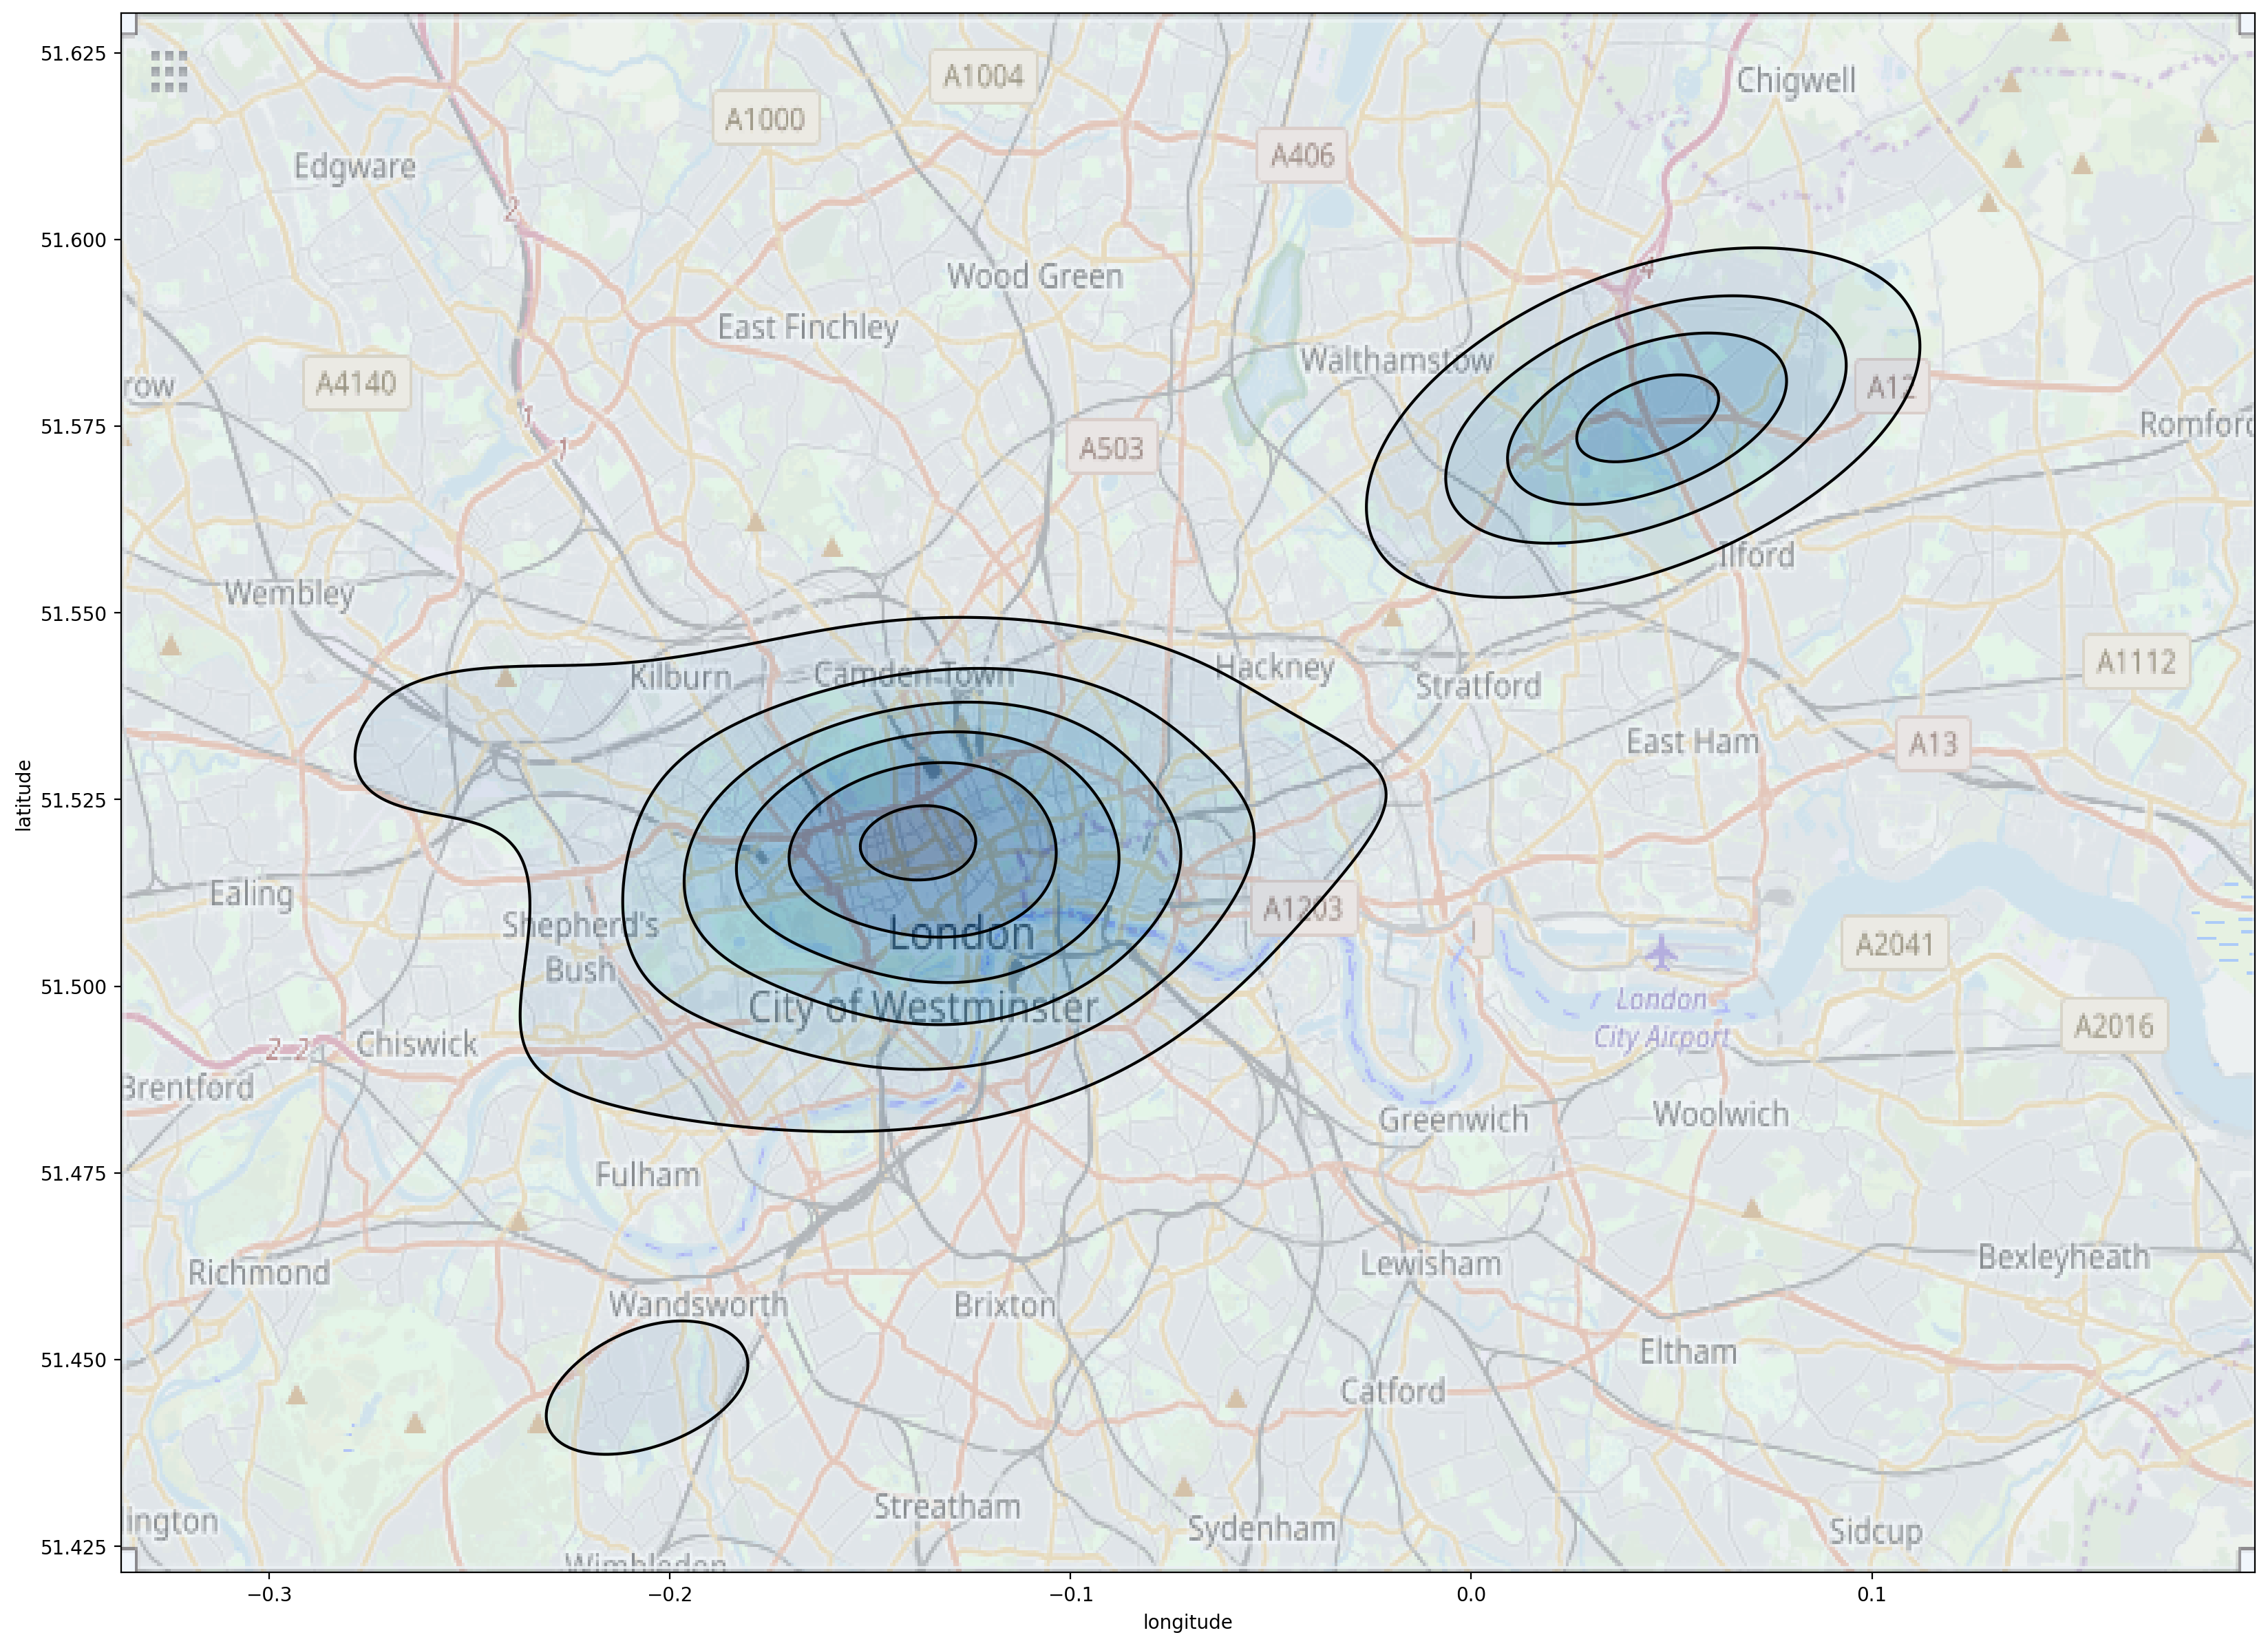

In [42]:
fig = plt.figure(figsize=(20, 15), dpi=200)
ax = fig.add_subplot(111)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues', alpha=0.5)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k')
# Label plot
#ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
london_map = plt.imread('london_sampling.png')
ax.imshow(london_map, zorder=0, extent = BBox, aspect= 'auto')

In [43]:
ymin, ymax, xmin, xmax

(51.421464866, 51.630265127, -0.336973212, 0.195491)

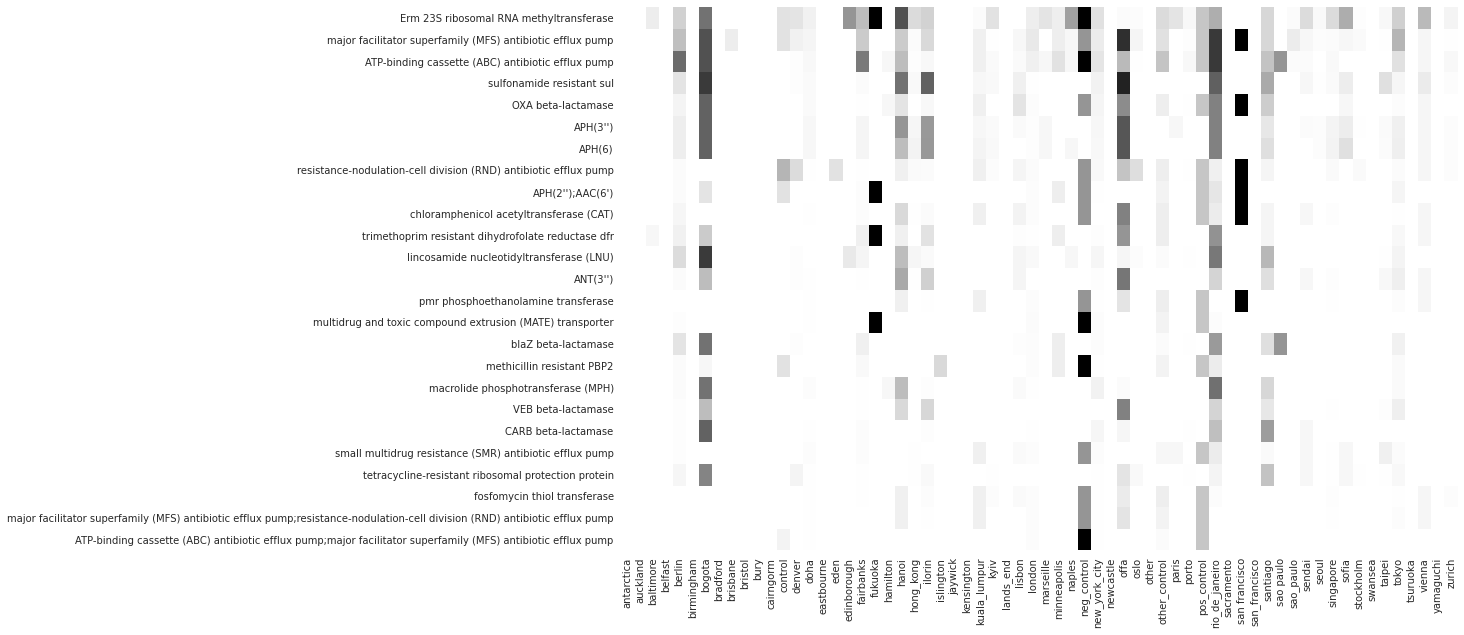

In [44]:
### look at distribution of AMR Gene Family across cities
cdf = groupByRow(df, 'AMR Gene Family', max)
cdf = groupByCol(cdf, 'city', np.mean)
sidx = cdf.sum(1).argsort().values
cdf = cdf.iloc[sidx[-25:]]
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.set_yticks(np.arange(cdf.index.shape[0]) + 0.5)
    ax.set_yticklabels(cdf.index)
    ax.set_xticks(np.arange(cdf.shape[1]) + 0.5)
    ax.set_xticklabels(cdf.columns, rotation=90)
    ax.pcolor(cdf)
    plt.savefig(os.path.join(plotdir, 'amr_CARD_nucleotide_fasta_protein_homolog_model_k%i.align.city_vs_AMRgenefamily.png' % K), format='png', bbox_inches='tight')

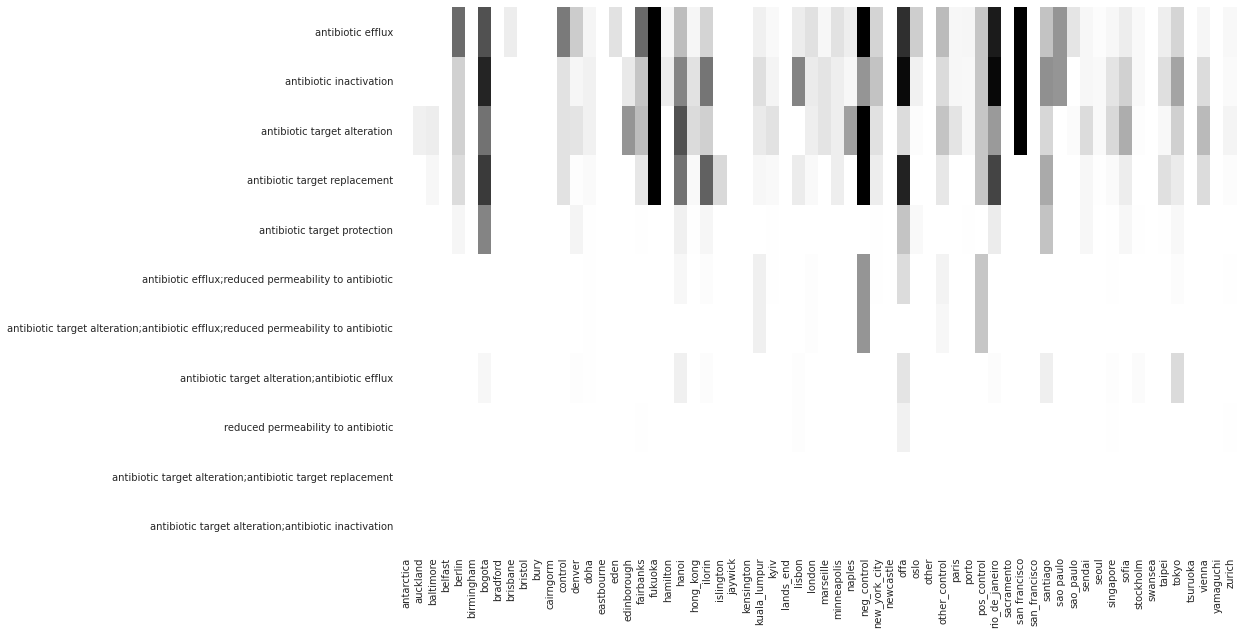

In [45]:
### look at distribution of AMR Gene Family across cities
cdf = groupByRow(df, 'Resistance Mechanism', max)
cdf = groupByCol(cdf, 'city', np.mean)
sidx = cdf.sum(1).argsort().values
cdf = cdf.iloc[sidx[-25:]]
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.set_yticks(np.arange(cdf.index.shape[0]) + 0.5)
    ax.set_yticklabels(cdf.index)
    ax.set_xticks(np.arange(cdf.shape[1]) + 0.5)
    ax.set_xticklabels(cdf.columns, rotation=90)
    ax.pcolor(cdf)
    plt.savefig(os.path.join(plotdir, 'amr_CARD_nucleotide_fasta_protein_homolog_model_k%i.align.city_vs_AMRresistance.png' % K), format='png', bbox_inches='tight')

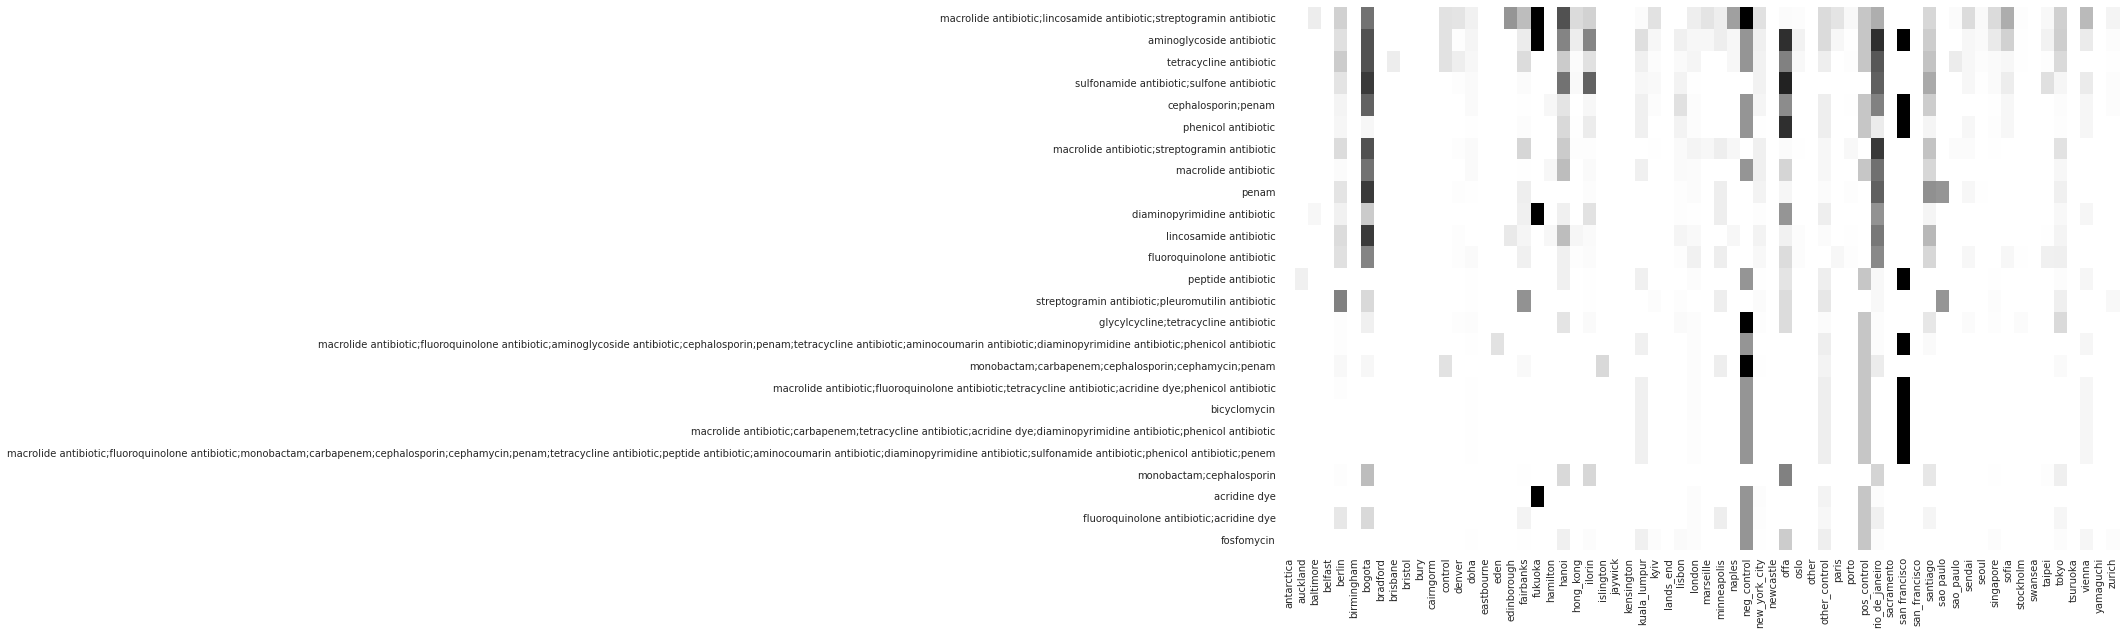

In [46]:
### look at distribution of AMR Gene Family across cities
cdf = groupByRow(df, 'Drug Class', max)
cdf = groupByCol(cdf, 'city', np.mean)
sidx = cdf.sum(1).argsort().values
cdf = cdf.iloc[sidx[-25:]]
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.set_yticks(np.arange(cdf.index.shape[0]) + 0.5)
    ax.set_yticklabels(cdf.index)
    ax.set_xticks(np.arange(cdf.shape[1]) + 0.5)
    ax.set_xticklabels(cdf.columns, rotation=90)
    ax.pcolor(cdf)
    plt.savefig(os.path.join(plotdir, 'amr_CARD_nucleotide_fasta_protein_homolog_model_k%i.align.city_vs_AMRdrugclass.png' % K), format='png', bbox_inches='tight')
        

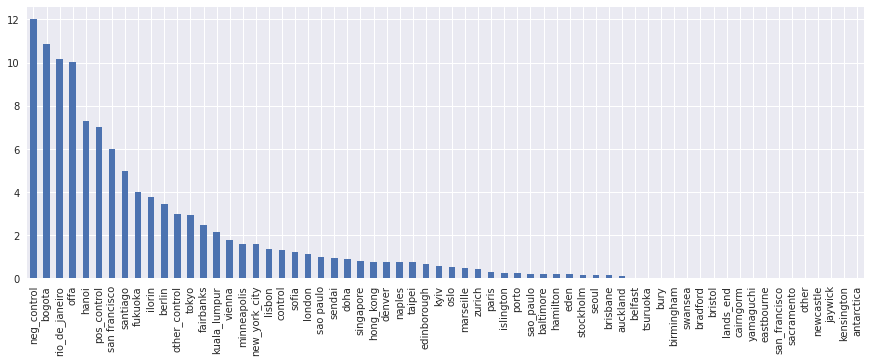

In [47]:
cdf = groupByRow(df, 'AMR Gene Family', max)
cdf = groupByCol(cdf, 'city', np.mean)
with plt.style.context('seaborn'):
    cdf.sum(0).sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))
    plt.savefig(os.path.join(plotdir, 'amr_CARD_nucleotide_fasta_protein_homolog_model_k%i.align.city_vs_AMRdrugclass_barplot.png' % K), format='png', bbox_inches='tight')
    

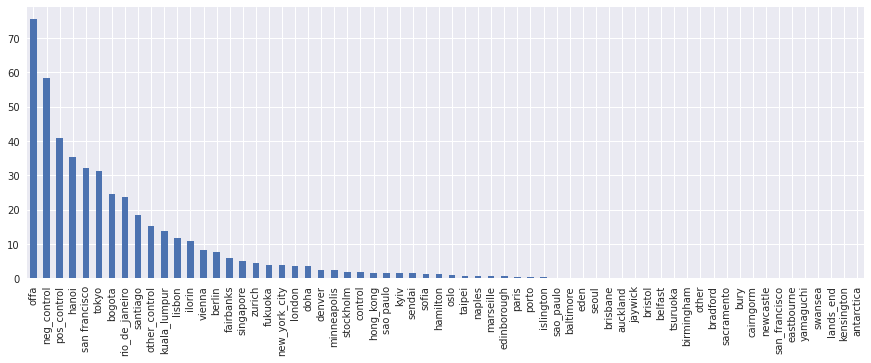

In [48]:
cdf = groupByCol(df, 'city', np.mean)
with plt.style.context('seaborn'):
    cdf.sum(0).sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))
    plt.savefig(os.path.join(plotdir, 'amr_CARD_nucleotide_fasta_protein_homolog_model_k%i.align.AMR_per_city.png' % K), format='png', bbox_inches='tight')
        

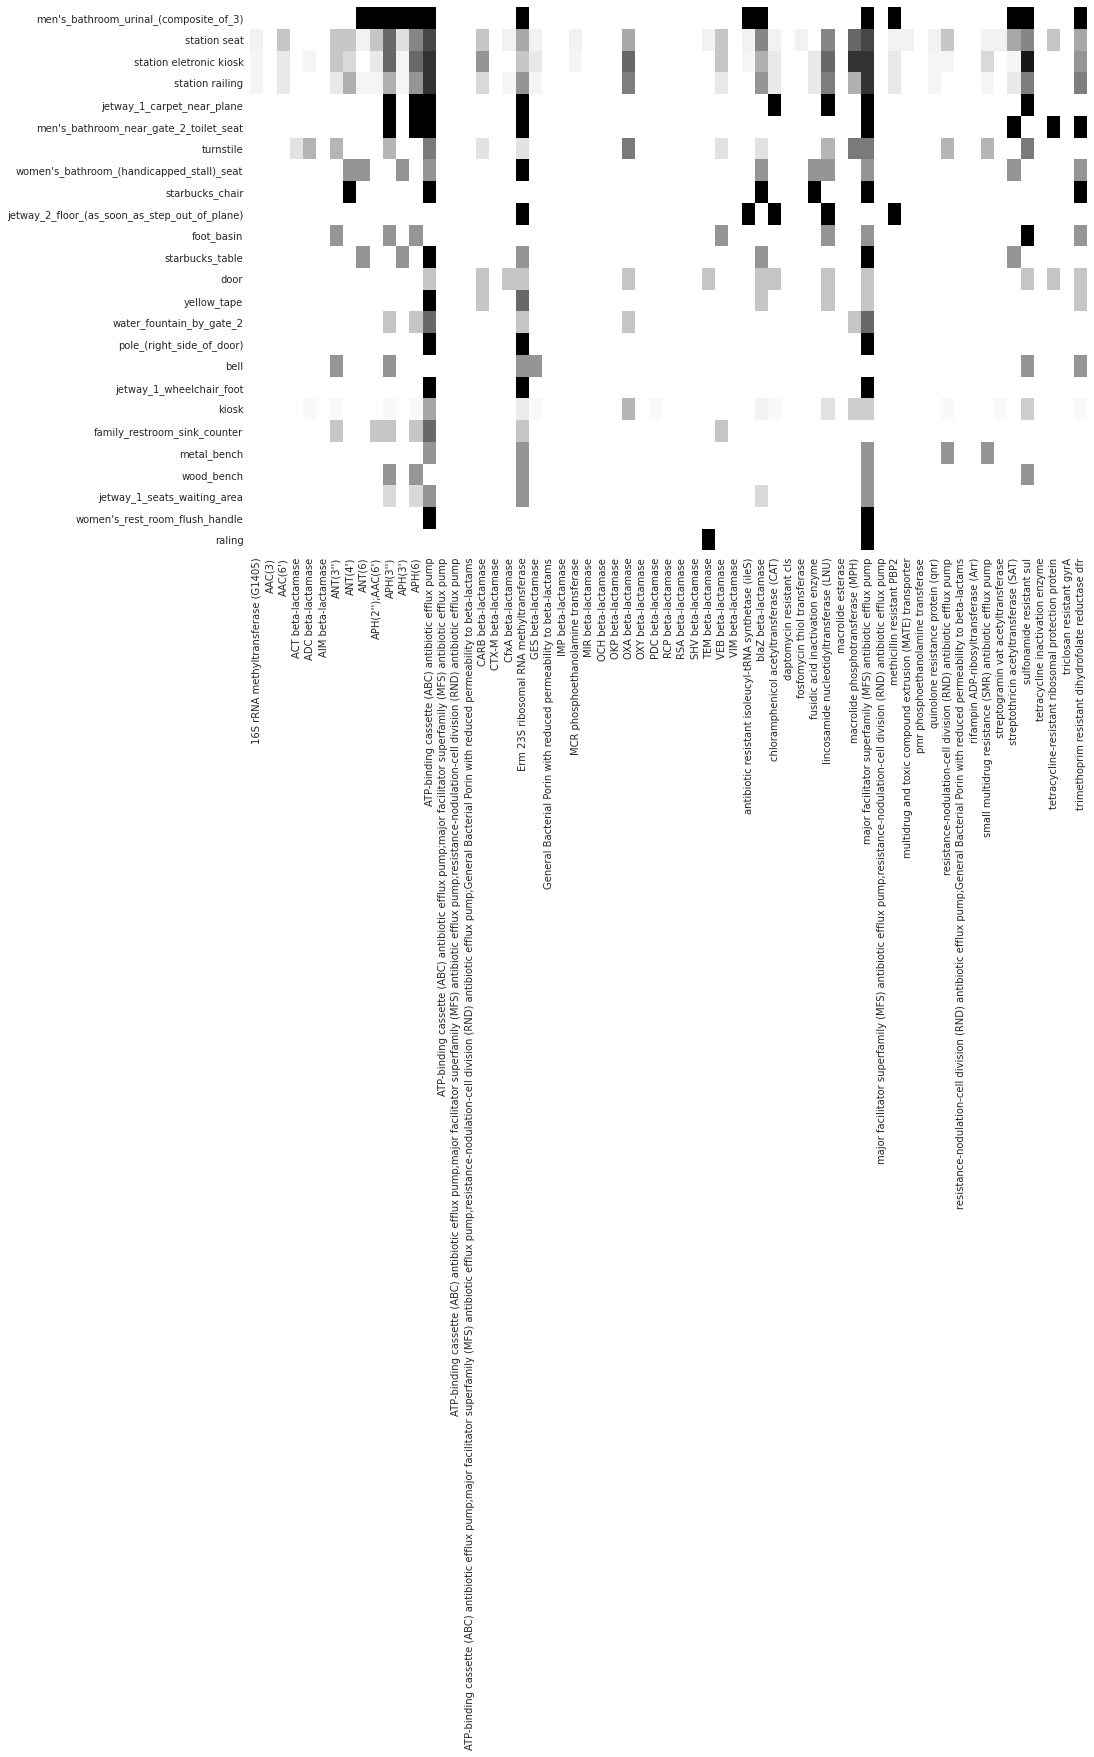

In [54]:
### look at distribution of AMR Gene Family across cities
cdf = groupByRow(df, 'AMR Gene Family', max)
cdf = groupByCol(cdf, 'surface', np.mean)
cdf = cdf[cdf.sum(1) > 0]
cdf = cdf.transpose()
sidx = cdf.sum(1).argsort().values
cdf = cdf.iloc[sidx[-25:]]
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.set_yticks(np.arange(cdf.index.shape[0]) + 0.5)
    ax.set_yticklabels(cdf.index)
    ax.set_xticks(np.arange(cdf.shape[1]) + 0.5)
    ax.set_xticklabels(cdf.columns, rotation=90)
    ax.pcolor(cdf)
    plt.savefig(os.path.join(plotdir, 'amr_CARD_nucleotide_fasta_protein_homolog_model_k%i.align.surface_vs_AMRgenefamily.png' % K), format='png', bbox_inches='tight')
    plt.savefig(os.path.join(plotdir, 'amr_CARD_nucleotide_fasta_protein_homolog_model_k%i.align.surface_vs_AMRgenefamily.pdf' % K), format='pdf', bbox_inches='tight')
        

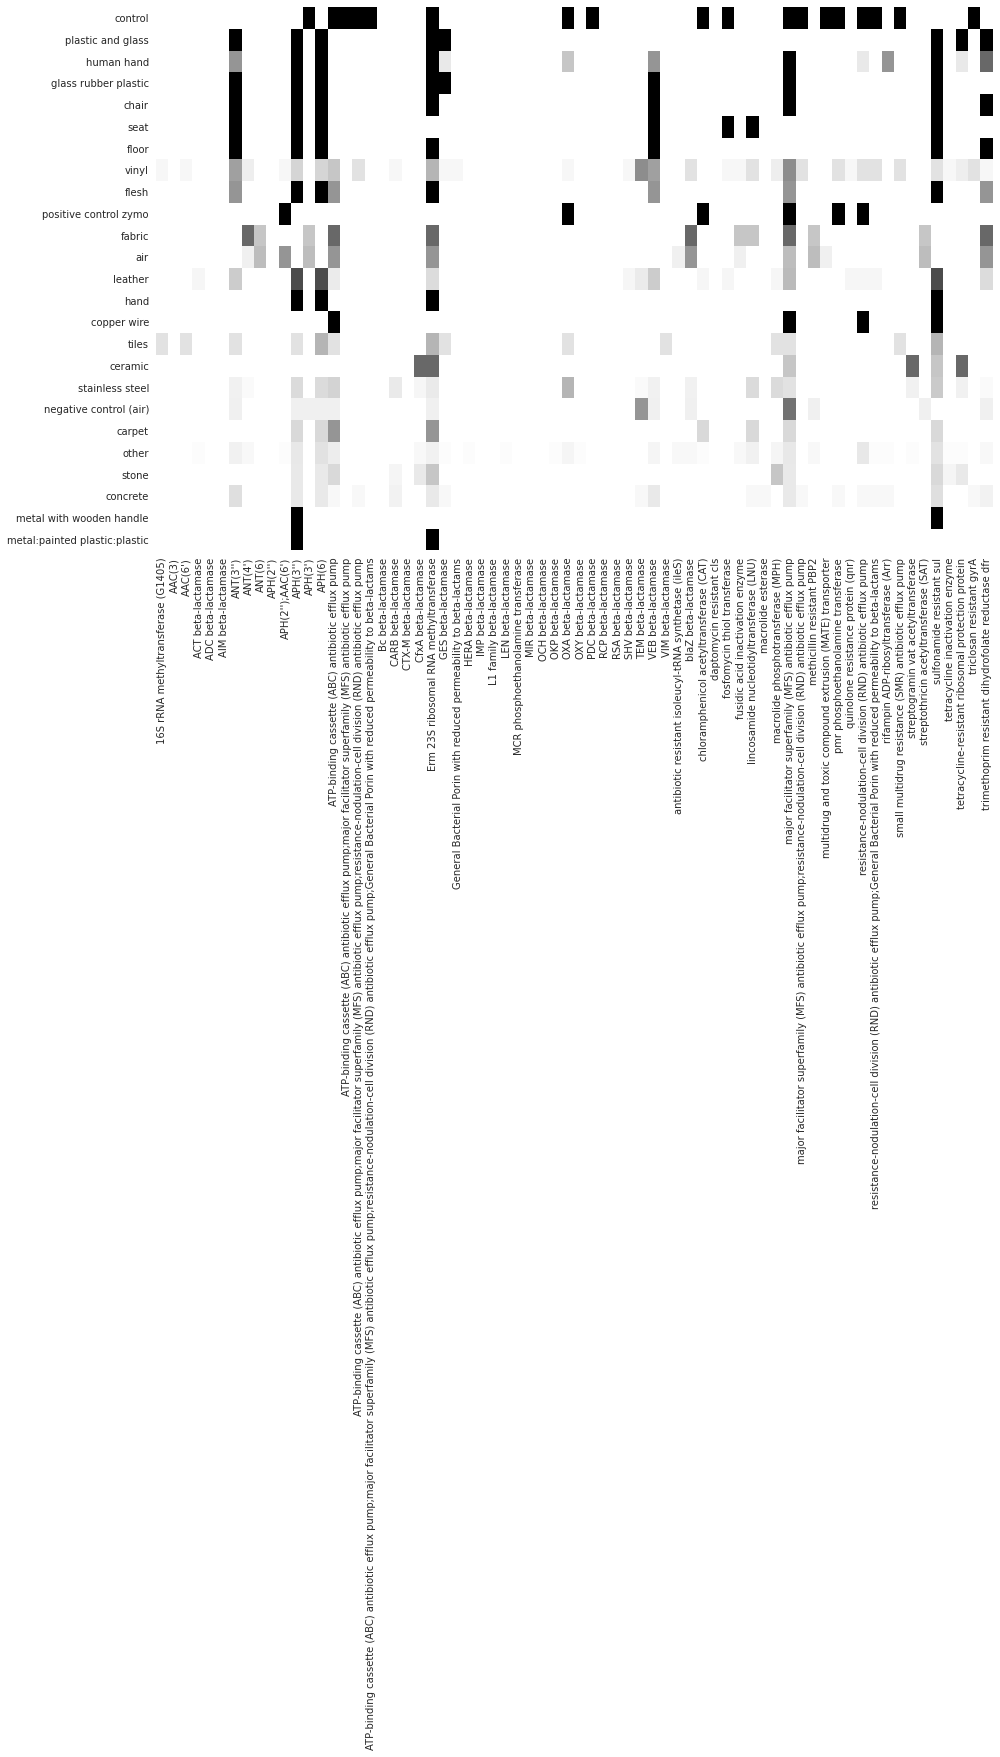

In [50]:
### look at distribution of AMR Gene Family across cities
cdf = groupByRow(df, 'AMR Gene Family', max)
cdf = groupByCol(cdf, 'surface_material', np.mean)
cdf = cdf[(cdf.sum(1) > 0)]
cdf = cdf.transpose()
sidx = cdf.sum(1).argsort().values
cdf = cdf.iloc[sidx[-25:]]
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.set_yticks(np.arange(cdf.index.shape[0]) + 0.5)
    ax.set_yticklabels(cdf.index)
    ax.set_xticks(np.arange(cdf.shape[1]) + 0.5)
    ax.set_xticklabels(cdf.columns, rotation=90)
    ax.pcolor(cdf)
    plt.savefig(os.path.join(plotdir, 'amr_CARD_nucleotide_fasta_protein_homolog_model_k%i.align.surfacematerial_vs_AMRgenefamily.png' % K), format='png', bbox_inches='tight')
    

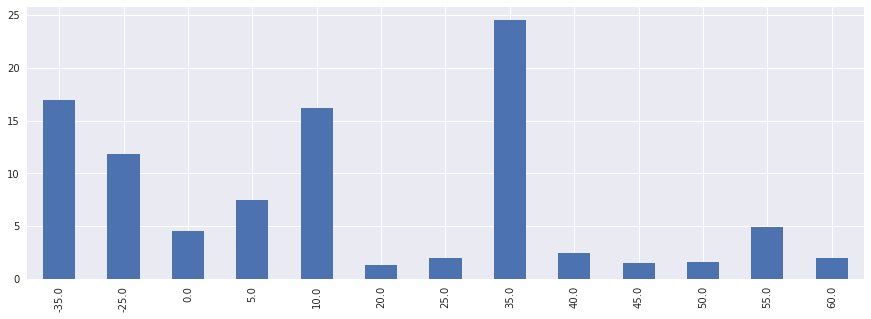

In [51]:
cdf = groupByCol(df, 'latitude_rounded', np.mean)
with plt.style.context('seaborn'):
    cdf.sum(0).plot(kind='bar', figsize=(15, 5))

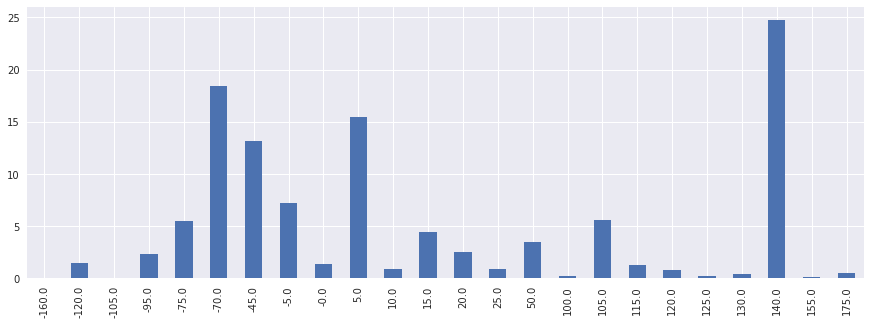

In [52]:
cdf = groupByCol(df, 'longitude_rounded', np.mean)
with plt.style.context('seaborn'):
    cdf.sum(0).plot(kind='bar', figsize=(15, 5))

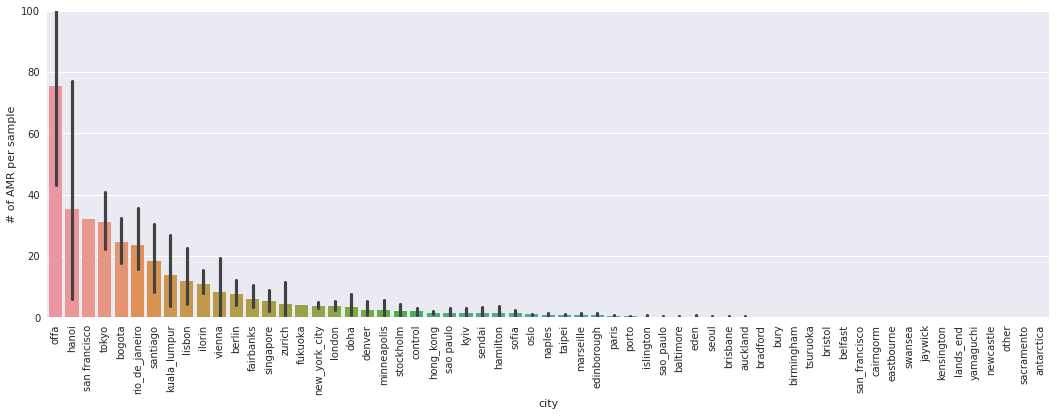

In [53]:
#cdf = groupByCol(df.sum(0), 'city', sp.sum)
cdf = pd.DataFrame(df.sum(0), columns=['sum'])
cdf['city'] = sample_metadata.loc[cdf.index.values, 'city']
cdf = cdf[~cdf.city.isin(['pos_control', 'neg_control', 'other_control'])]
order = cdf.groupby('city').mean()['sum'].sort_values(ascending=False).index
with plt.style.context('seaborn'):
    #fig = plt.figure(figsize=(30, 5))
    #ax = fig.add_subplot(111)
    cax = sns.catplot(x='city', y='sum', data=cdf, kind='bar', aspect=3, order=order)#, scale='width')#, scale='width', aspect=3, width=0.9, order=order)
    cax.set_xticklabels(rotation=90)
    cax.set(ylim=(0, 100))
    cax.set(ylabel='# of AMR per sample')
    plt.savefig(os.path.join(plotdir, 'amr_CARD_nucleotide_fasta_protein_homolog_model_k%i.align.AMR_load_per_city.png' % K), format='png', bbox_inches='tight')
        